In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop

In [2]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
from keras import backend as k


In [5]:
if k.image_data_format()=='channels_first':
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
    input_shape=(1,28,28)
else:
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
    input_shape=(28,28,1)


In [6]:
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255


In [7]:
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

In [12]:
train_labels[0]#number 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


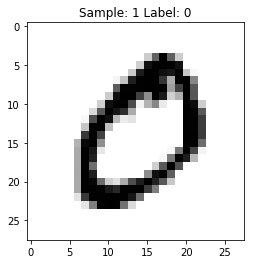

In [15]:
import matplotlib.pyplot as plt
def display_sample(num):
    print(train_labels[num])
    
    label=train_labels[num].argmax(axis=0)
    image=train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d'%(num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1)
    

In [ ]:
#[[1],[2],[3],[4],[5]]
#flatten--->
[1,2,3,4,5]

In [18]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))#grid search random search
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


TypeError: softmax() got an unexpected keyword argument 'axis'